In [52]:
# Write a kmeans plus plus algorithm to initialize the centroids to be used in the kmeans algorithm
# Initialize centroids based on a probability index set by their distance from each other
# Dataset is a numpy array and k is the number of centroids


import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline


def kmeans_plus_plus(dataset, k):
    # define the shape of the dataset
    N, D = dataset.shape
    # define the centroid size
    C = np.zeros([k, D])
    # pick a random instance in the dataset
    random_index = np.random.choice(len(dataset))
    random_instance = dataset[random_index]
    for i in range(k):
        # define the distance from the randomly 
        distance_array = np.linalg.norm(random_instance - dataset , axis = 1)
        prob_array = distance_array / np.sum(distance_array)
        chosen_index = np.random.choice(len(dataset) , p = prob_array)
        C[i] = dataset[chosen_index]
        random_instance = C[i]  
    return C

# test the function 
if __name__ == '__main__':
    
    # download your copy of wine dataset from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/
    # change the format to .txt or .cvs if current data is causing any parsing error.
    
    dataset = np.loadtxt('wine.data.txt' , dtype = float, delimiter = ',')
    dataset = np.array(dataset)
    print(kmeans_plus_plus(dataset, 2))
     
    # if there was a need for standardization, this code below could be applied:
    # standardized_data = [(i - np.mean(dataset)) / (np.std(dataset)) for i in dataset]
    

[[2.000e+00 1.182e+01 1.470e+00 1.990e+00 2.080e+01 8.600e+01 1.980e+00
  1.600e+00 3.000e-01 1.530e+00 1.950e+00 9.500e-01 3.330e+00 4.950e+02]
 [2.000e+00 1.222e+01 1.290e+00 1.940e+00 1.900e+01 9.200e+01 2.360e+00
  2.040e+00 3.900e-01 2.080e+00 2.700e+00 8.600e-01 3.020e+00 3.120e+02]]


[       0.    17592402.704  4545800.928  2633614.463  1341434.153
   916424.194   684095.537   415042.347   674861.281   353365.048
   657438.809   187113.672   492970.971   565012.338   138874.119]


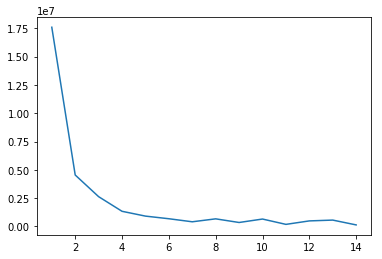

In [53]:
# the Within-Cluster-Sum-of-Squares amount normally goes down as the number of clusters increase
# the ideal number of clusters can be chosen if the WCSS graph achieves a clear elbow shape

def k_means(dataset, k):
    WCSS = 0
    # create an array to collect the indices of the groups
    final_array = np.zeros(len(dataset))
    # initialize the centroids
    C = kmeans_plus_plus(dataset, k)
    # create an old C, initialize with zeros
    C_old = np.zeros(C.shape)
    # define error function
    parameter_gradient = np.linalg.norm(C-C_old)
    # count the number of epochs performed until the error is zero, put an iterator
    epoch = 0
    # loop over the dataset, measure the distance btw C and all data points, assign group indices, re-assign C
    while parameter_gradient > 1e-4:  
        for i in range(len(dataset)):
            distance = np.linalg.norm((dataset[i] - C), axis = 1) # the len distance array is the lenght of centroid
            centroid_index = np.argmin(distance) # group sign is some number between [0,k) # YL: call that centroid_index
            # YL: "sign" is either -1 or +1. This is not usable here.
            final_array[i] = centroid_index
        # now our current C is going to be C_old, find the new C 
        C_old = np.copy(C)
        for i in range(k):
            # list of items with the same group numbers are assigned to sub_groups
            sub_group = [dataset[j] for j in range(len(dataset)) if final_array[j] == i]
            # take the mean of the sub-group and 
            mean_of_sub_group = np.mean(sub_group, axis = 0)
            # assign the new values to C
            C[i] = mean_of_sub_group
        parameter_gradient = np.linalg.norm(C - C_old) # when C does not change, we reach to zero error 
        epoch += 1

    for j in range(k):
        grouped_data = [dataset[i] for i in range(len(dataset)) if final_array[i] == j]
        mean_of_grouped_data = np.mean(grouped_data, axis = 0) # outputs number of attributes
        for i in range(len(grouped_data)):
            WCSS += np.sum((grouped_data[i] - mean_of_grouped_data)**2)  
            
    
    # return the final cluster coordinates, the array carrying indices of all data points, and the WCSS with given k
    return epoch, C, final_array, WCSS


if __name__ == '__main__':
    dataset = np.loadtxt('wine.data.txt' , dtype = float, delimiter = ',')
    dataset = np.array(dataset)
    np.random.seed(1)
    k = 15
    def run_k_means():
        WCSS_list = np.zeros(k)
        for i in range(1, k):
            epoch, C, final_array, WCSS = k_means(dataset, i)
            WCSS_list[i] = WCSS

        return WCSS_list

    result = run_k_means()
    print(result)
    plt.plot(np.arange(1, k), result[1:])
    